## Load Dataset

### Subtask:
Load the `/content/Crop_recommendation.csv` file into a pandas DataFrame.


**Reasoning**:
To load the CSV file into a pandas DataFrame and display its first 5 rows, I need to first import the pandas library, then use `pd.read_csv()` with the provided file path, and finally call the `.head()` method on the DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\ALI_DA\Desktop\agri_sphere\ai-models\ml_crop_recommendation/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Explore Data



In [2]:
print("Missing values:\n", df.isnull().sum())
print("\nData types and non-null counts:\n")
df.info()
print("\nDescriptive statistics:\n", df.describe())

Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

Descriptive statistics:
                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    4

c:\Users\ALI_DA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ALI_DA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ALI_DA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ALI_DA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

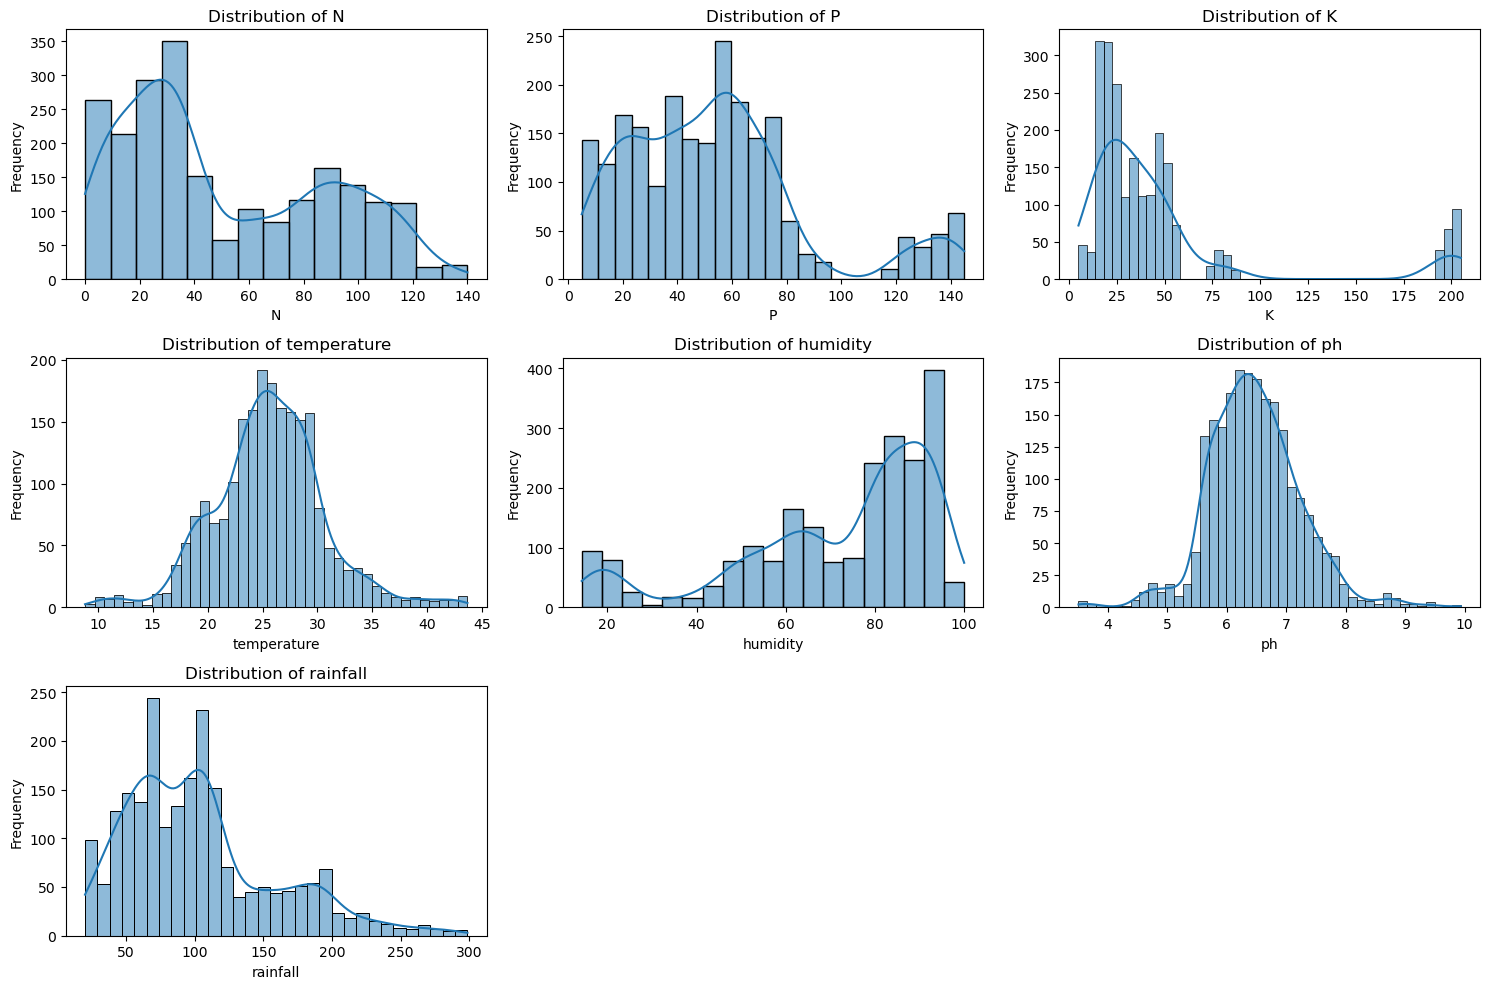

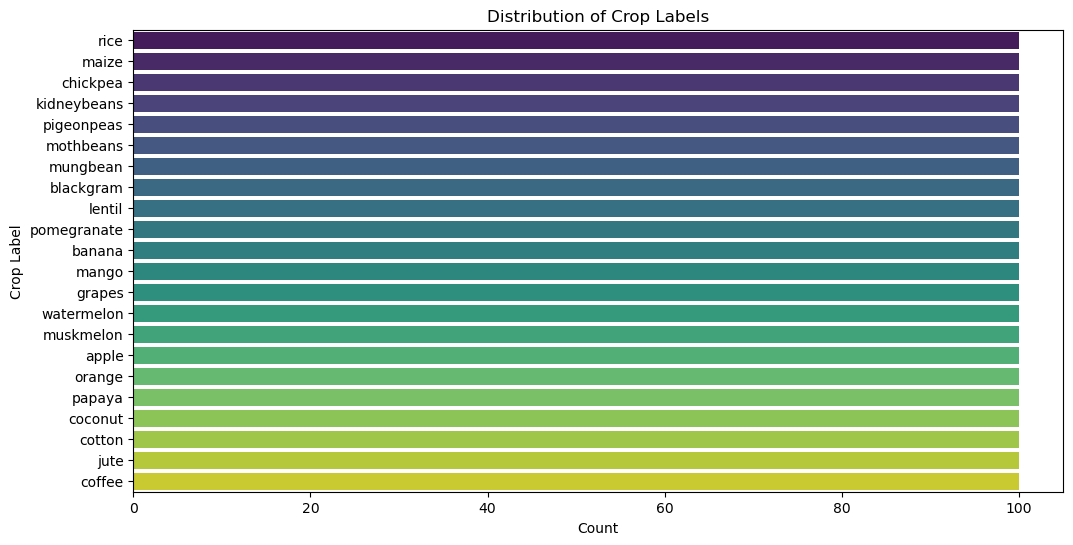

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1) # Arrange in 3 rows, 3 columns
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualize the distribution of the target variable ('label')
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label'], palette='viridis')
plt.title('Distribution of Crop Labels')
plt.xlabel('Count')
plt.ylabel('Crop Label')
plt.show()


## Preprocess Data

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Encode the categorical target variable 'y' into numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1760, 7)
Shape of X_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Features scaled successfully.
Shape of X_train_scaled: (1760, 7)
Shape of X_test_scaled: (440, 7)


## Model Training

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("RandomForestClassifier trained successfully.")
print(f"Shape of predictions (y_pred): {y_pred.shape}")

RandomForestClassifier trained successfully.
Shape of predictions (y_pred): (440,)


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision (weighted): {precision:.4f}")
print(f"Model Recall (weighted): {recall:.4f}")
print(f"Model F1-score (weighted): {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9932
Model Precision (weighted): 0.9937
Model Recall (weighted): 0.9932
Model F1-score (weighted): 0.9932

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1

## Evaluate Model Performance

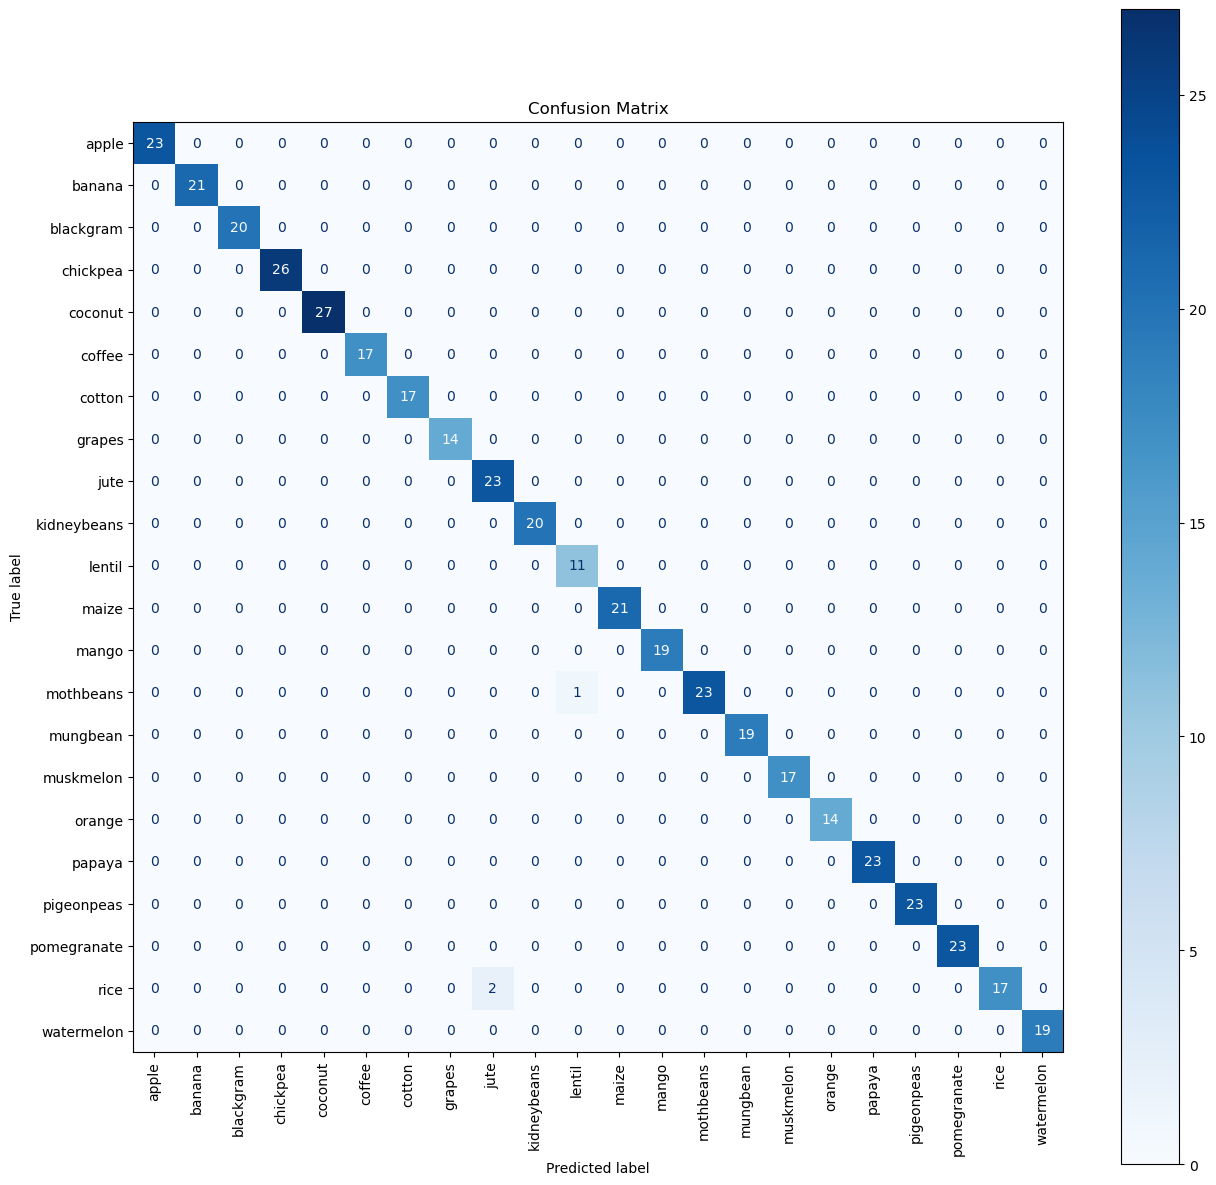

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

fig, ax = plt.subplots(figsize=(15, 15)) 
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.xticks(rotation=90) 
plt.yticks(rotation=0)
plt.show()

## Implement Recommendation Logic

In [9]:
import numpy as np

def recommend_crop(input_features):
    # Convert input_features to a NumPy array and reshape for the scaler
    features_array = np.array(input_features).reshape(1, -1)

    # Scale the input features using the trained scaler
    scaled_features = scaler.transform(features_array)

    # Predict the crop label using the trained model
    predicted_label_numeric = model.predict(scaled_features)

    # Convert the numerical prediction back to the original crop name
    predicted_crop_name = label_encoder.inverse_transform(predicted_label_numeric)

    return predicted_crop_name[0]

# Testing the function with a sample set of input features
# Using the first row of the original unscaled X for testing
sample_input_features = X.iloc[1].values

# Get the recommended crop
recommended_crop_name = recommend_crop(sample_input_features)

print(f"Sample Input Features: {sample_input_features}")
print(f"Recommended Crop: {recommended_crop_name}")

Sample Input Features: [ 85.          58.          41.          21.77046169  80.31964408
   7.03809636 226.6555374 ]
Recommended Crop: rice


c:\Users\ALI_DA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:


def manual_test(n, p, k, temp, humidity, ph, rainfall):
    features = np.array([[n, p, k, temp, humidity, ph, rainfall]])
    
    scaled_features = scaler.transform(features)
    
    prediction_numeric = model.predict(scaled_features)
    
    crop_name = label_encoder.inverse_transform(prediction_numeric)
    
    print(f"--- Input ---")
    print(f"N: {n}, P: {p}, K: {k}, Temp: {temp}°C, Humidity: {humidity}%, pH: {ph}, Rain: {rainfall}mm")
    print(f"--- Recommendation ---")
    print(f"Recommended Crop: {crop_name[0].upper()}")

manual_test(n=150, p=30, k=33, temp=30.8, humidity=82.0, ph=6.0, rainfall=202.9)

--- Input ---
N: 150, P: 30, K: 33, Temp: 30.8°C, Humidity: 82.0%, pH: 6.0, Rain: 202.9mm
--- Recommendation ---
Recommended Crop: COFFEE


c:\Users\ALI_DA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
